In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import sklearn
import tensorflow as tf
from tensorflow import keras
from PIL import Image as im
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from pathlib import Path
from tqdm.notebook import tqdm
from sklearn import preprocessing
import plotly.express as px
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
train_root_path ='/content/drive/MyDrive/Diabetic Retinopathy Project/Dataset/train'
test_root_path ='/content/drive/MyDrive/Diabetic Retinopathy Project/Dataset/test'
validation_path='/content/drive/MyDrive/Diabetic Retinopathy Project/Dataset/valid'

Data Pre Processing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
rescale=1./255
)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Diabetic Retinopathy Project/Dataset/train',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 2076 images belonging to 2 classes.


In [ ]:
validation_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Diabetic Retinopathy Project/Dataset/valid',
    target_size=(224,224),
    color_mode="rgb",
    batch_size=32,  # set as validation data
    class_mode='categorical',
    shuffle=True
)

Found 531 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Diabetic Retinopathy Project/Dataset/valid',
    target_size=(224,224),
    color_mode="rgb",
    batch_size=32,  # set as test data
    class_mode='categorical',
    shuffle=True
)

Found 531 images belonging to 2 classes.


In [ ]:
#Check data type/shape
img= train_set[0]
print(f'Train data type: {type(train_set)}')
print(f'Train data shape: {train_set[0][0].shape}')
print(f'Train classes: {img[1].shape}')

img= validation_set[0]
print(f'\nValid. data type: {type(validation_set)}')
print(f'Valid. data shape: {validation_set[0][0].shape}')
print(f'Valid. classes: {img[1].shape}')

img= test_set[0]
print(f'\nTest data type: {type(test_set)}')
print(f'Test data shape: {test_set[0][0].shape}')
print(f'Test classes: {img[1].shape}')

Train data type: <class 'keras.src.preprocessing.image.DirectoryIterator'>
Train data shape: (32, 224, 224, 3)
Train classes: (32, 2)

Valid. data type: <class 'keras.src.preprocessing.image.DirectoryIterator'>
Valid. data shape: (32, 224, 224, 3)
Valid. classes: (32, 2)

Test data type: <class 'keras.src.preprocessing.image.DirectoryIterator'>
Test data shape: (32, 224, 224, 3)
Test classes: (32, 2)


Data Visualization

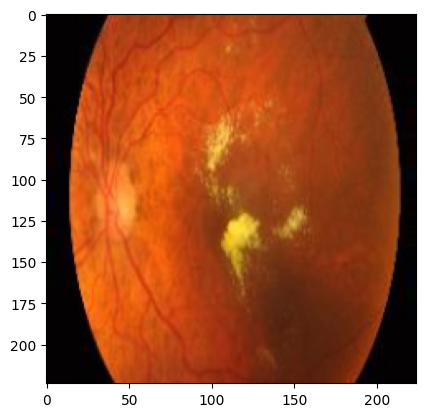

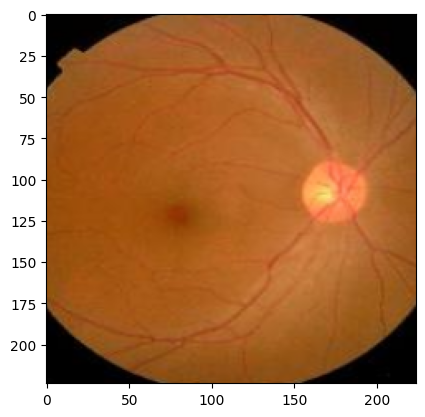

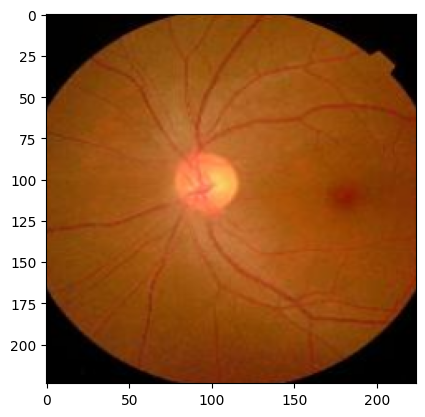

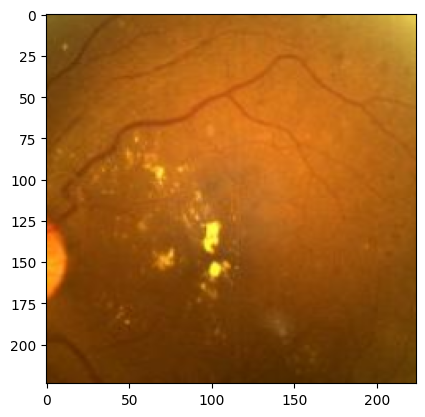

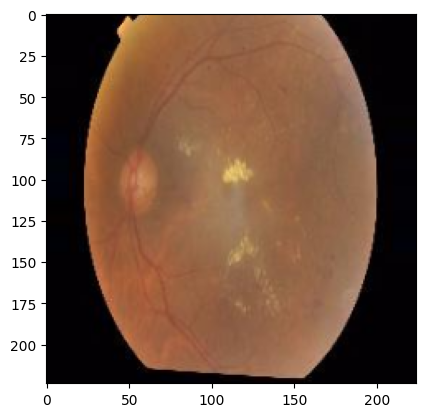

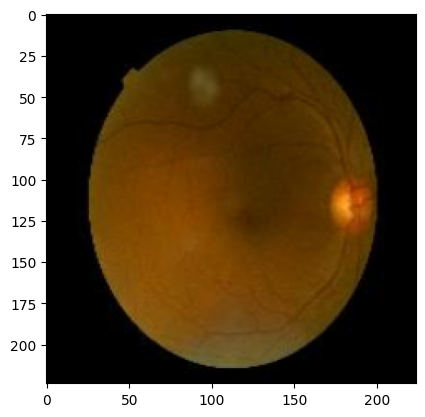

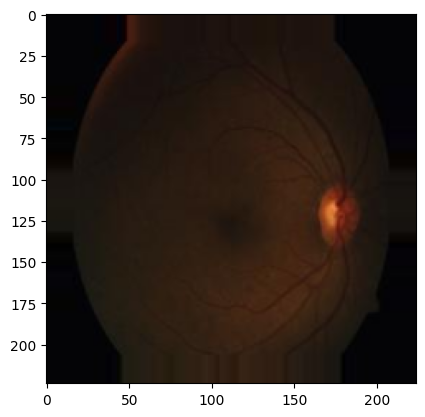

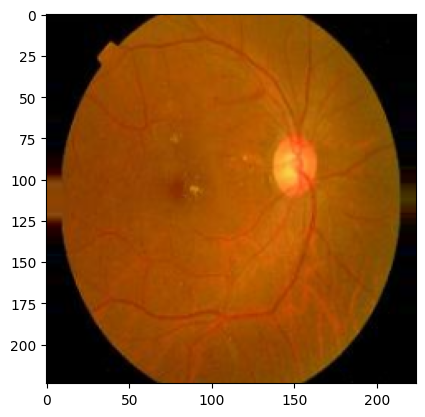

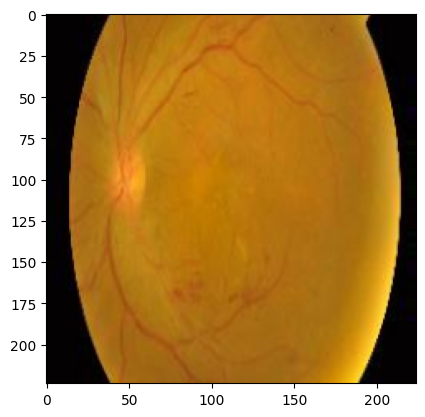

In [ ]:
im, la = next(train_set)

for i in range(9):
    plt.imshow(im[i])
    plt.show()

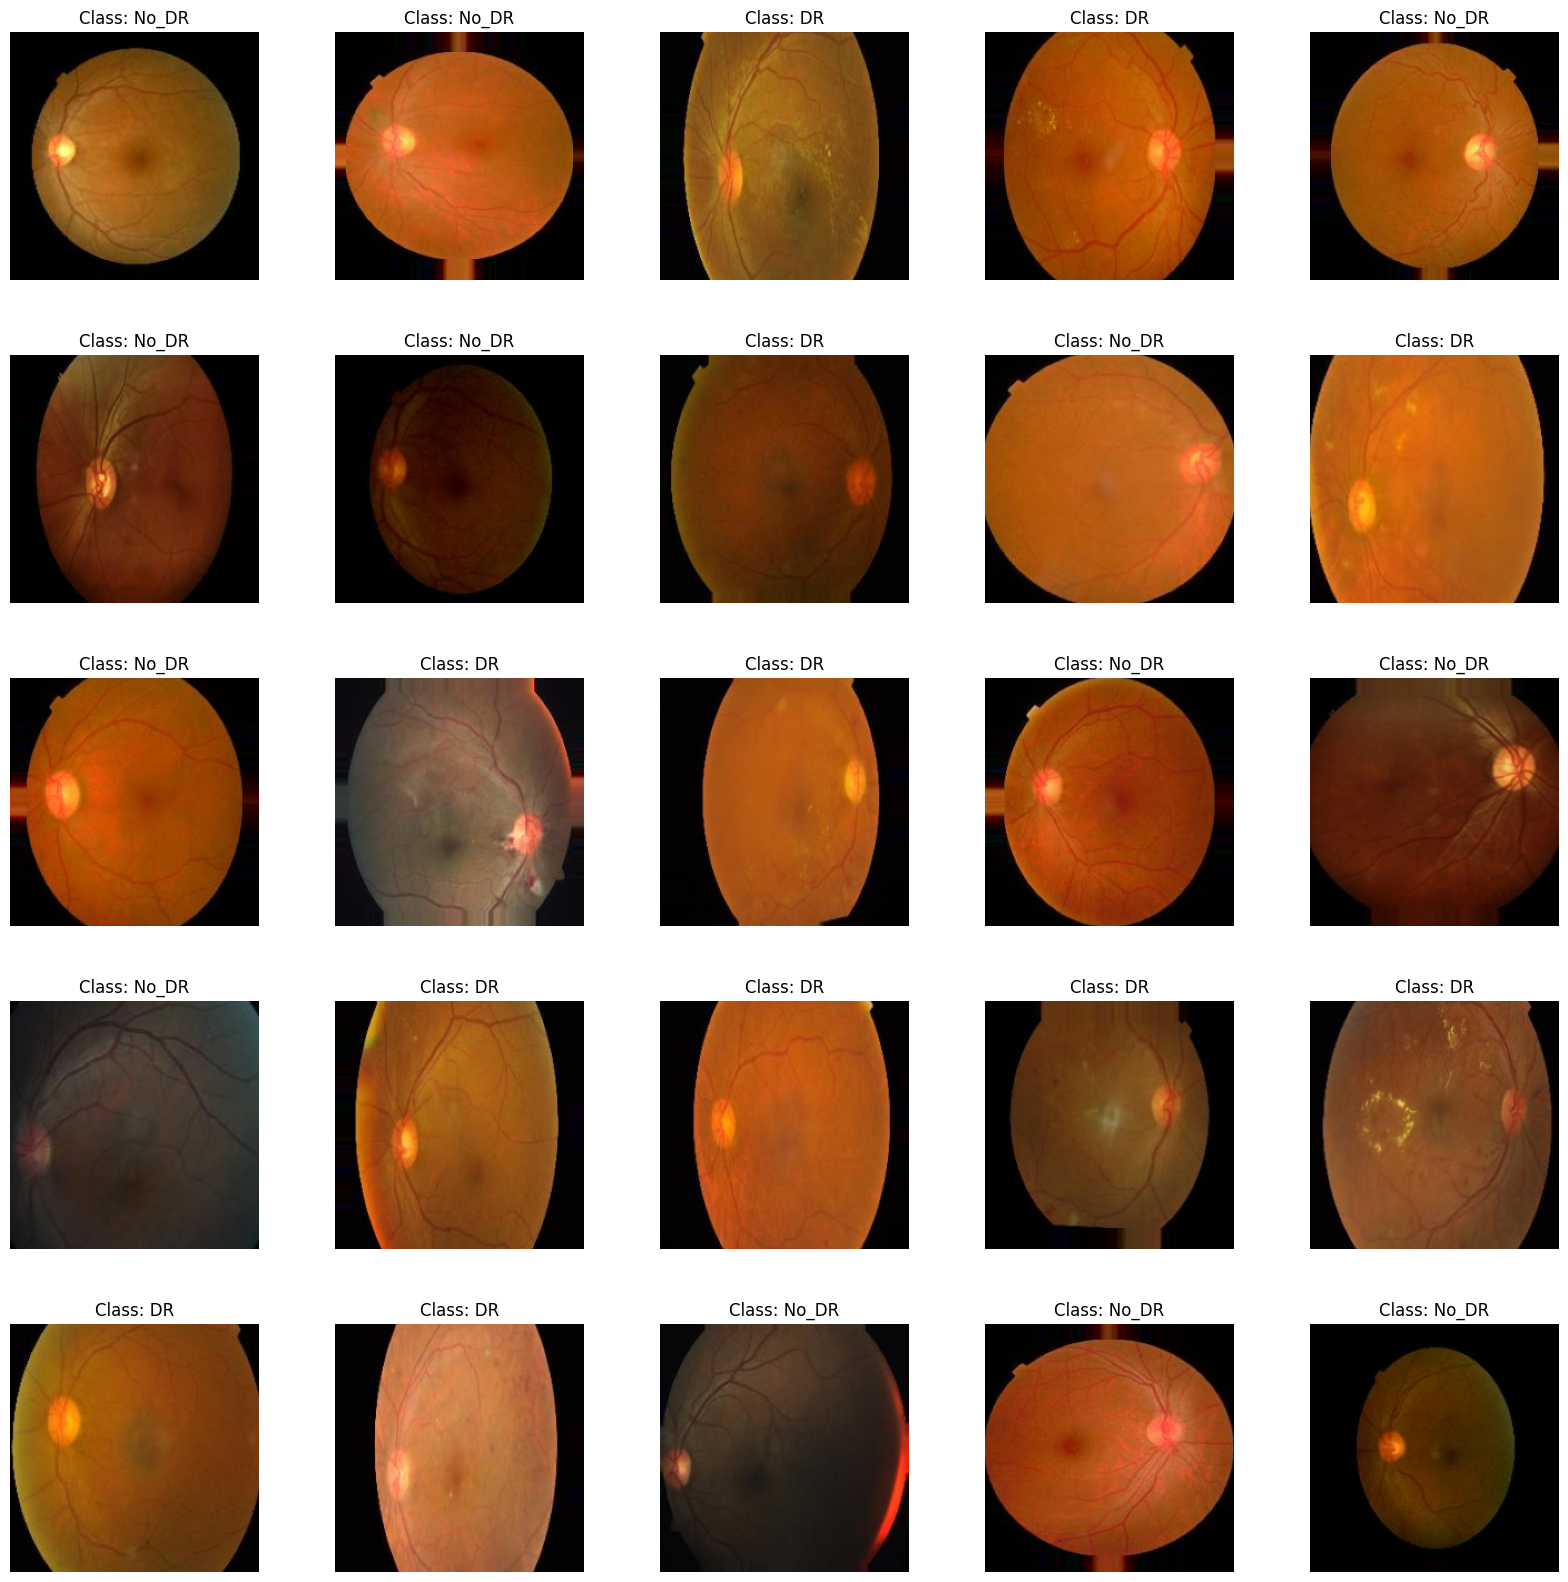

In [ ]:
# Display a grid of 25 sample training images with corresponding class labels.
labels = [k for k in train_set.class_indices]
sample_generate = train_set.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(25):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

Working with 1026 images
Image examples: 
31360e44ac64_png.rf.4e6b4bbe1ccd8bdca8086ca636034172.jpg


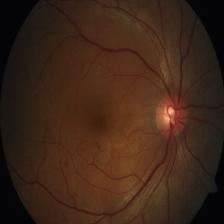

658ad9f09f5d_png.rf.ba5c6a3568112f778b4efd84be9ea352.jpg


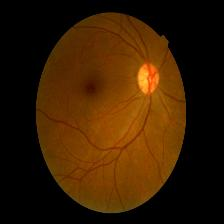

4d17559ac1e2_png.rf.917ad162ae374a2fcd03677623fa682f.jpg


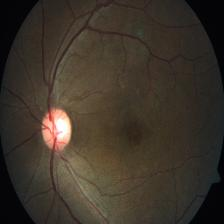

a73d012c4c38_png.rf.a9c5f3e5382df97be461fe3626c7a0c3.jpg


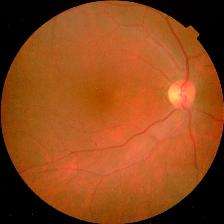

916915f01e17_png.rf.102428122da1f957b63db6e75ec7cca5.jpg


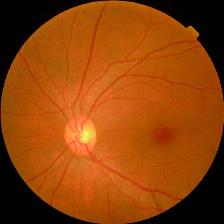

540e4973829e_png.rf.9127b80535b008d0e86def18ff46cafc.jpg


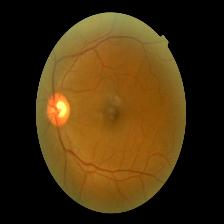

b294927b14b0_png.rf.94e65aea5fa345ed47b16cd2b191372b.jpg


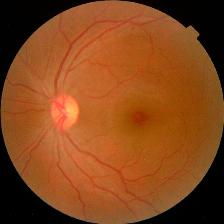

7eeb191ad06b_png.rf.8971b3bc6c45dda66d3d72a70a52a532.jpg


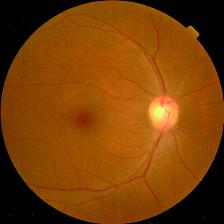

7d48f8cdfb69_png.rf.dd09e739b67bb63a8e38858af1efa4a8.jpg


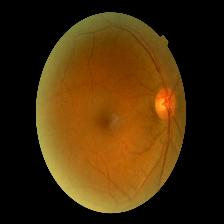

991a0b7a8c87_png.rf.eb0bf7c26c116a3db2d3a11f8e9a299a.jpg


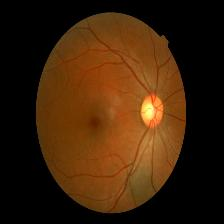

In [ ]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object

image_path = "/content/drive/MyDrive/Diabetic Retinopathy Project/Dataset/train"
folder = image_path+'/No_DR'



onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")
for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

VGG-19

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = [224, 224]
CHANNELS=3
EPOCHS=10

In [ ]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg19.layers:
    print(layer)

In [ ]:
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model_vgg19 = Sequential()

model_vgg19.add(vgg19)
model_vgg19.add(Flatten())
model_vgg19.add(Dropout(0.2))
model_vgg19.add(Dense(256,activation='relu'))
model_vgg19.add(Dropout(0.2))
model_vgg19.add(Dense(2,activation='softmax'))

In [ ]:
model_vgg19.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 26447682 (100.89 MB)
Trainable params: 642

In [ ]:
model_vgg19.compile(
    optimizer = Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
model_vgg_history = model_vgg19.fit(
  train_set,
  validation_data=validation_set,
  epochs=EPOCHS,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/10
65/65 [==============================] - 625s 9s/step - loss: 0.8256 - accuracy: 0.8555 - val_loss: 0.2152 - val_accuracy: 0.9228
Epoch 2/10
65/65 [==============================] - 37s 566ms/step - loss: 0.2170 - accuracy: 0.9171 - val_loss: 0.2675 - val_accuracy: 0.9171
Epoch 3/10
65/65 [==============================] - 36s 558ms/step - loss: 0.2231 - accuracy: 0.9210 - val_loss: 0.2795 - val_accuracy: 0.9209
Epoch 4/10
65/65 [==============================] - 37s 563ms/step - loss: 0.2110 - accuracy: 0.9287 - val_loss: 0.2035 - val_accuracy: 0.9209
Epoch 5/10
65/65 [==============================] - 37s 564ms/step - loss: 0.2322 - accuracy: 0.9143 - val_loss: 0.2094 - val_accuracy: 0.9209
Epoch 6/10
65/65 [==============================] - 52s 793ms/step - loss: 0.1988 - accuracy: 0.9350 - val_loss: 0.1733 - val_accuracy: 0.9284
Epoch 7/10
65/65 [==============================] - 36s 545ms/step - loss: 0.1993 - accuracy: 0.9306 - val_loss: 0.2182 - val_accuracy: 0.9284
E

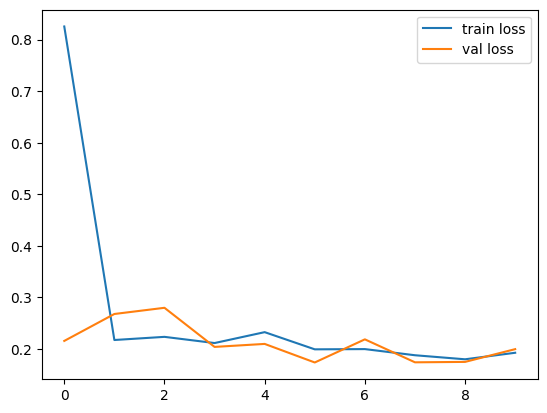

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(model_vgg_history.history['loss'], label='train loss')
plt.plot(model_vgg_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

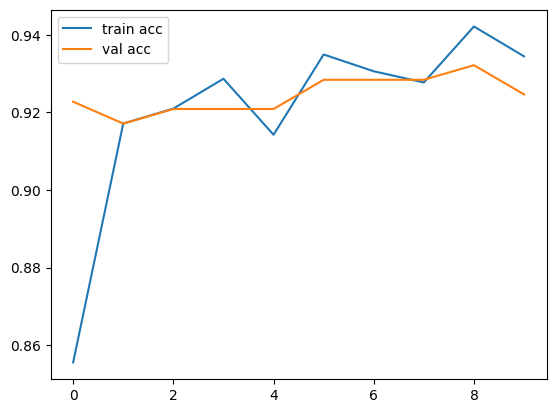

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(model_vgg_history.history['accuracy'], label='train acc')
plt.plot(model_vgg_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming train_set and validation_set are properly defined and preprocessed
# Predict the probabilities
validation_predictions_prob = model_vgg19.predict(validation_set, steps=len(validation_set))

# Convert probabilities to class labels
validation_predictions = np.argmax(validation_predictions_prob, axis=1)

# Get true labels
true_labels = validation_set.classes

# Generate the classification report
report = classification_report(true_labels, validation_predictions, target_names=validation_set.class_indices.keys())

print(report)


17/17 [==============================] - 3s 160ms/step
              precision    recall  f1-score   support

          DR       0.51      0.46      0.48       245
       No_DR       0.57      0.62      0.59       286

    accuracy                           0.54       531
   macro avg       0.54      0.54      0.54       531
weighted avg       0.54      0.54      0.54       531



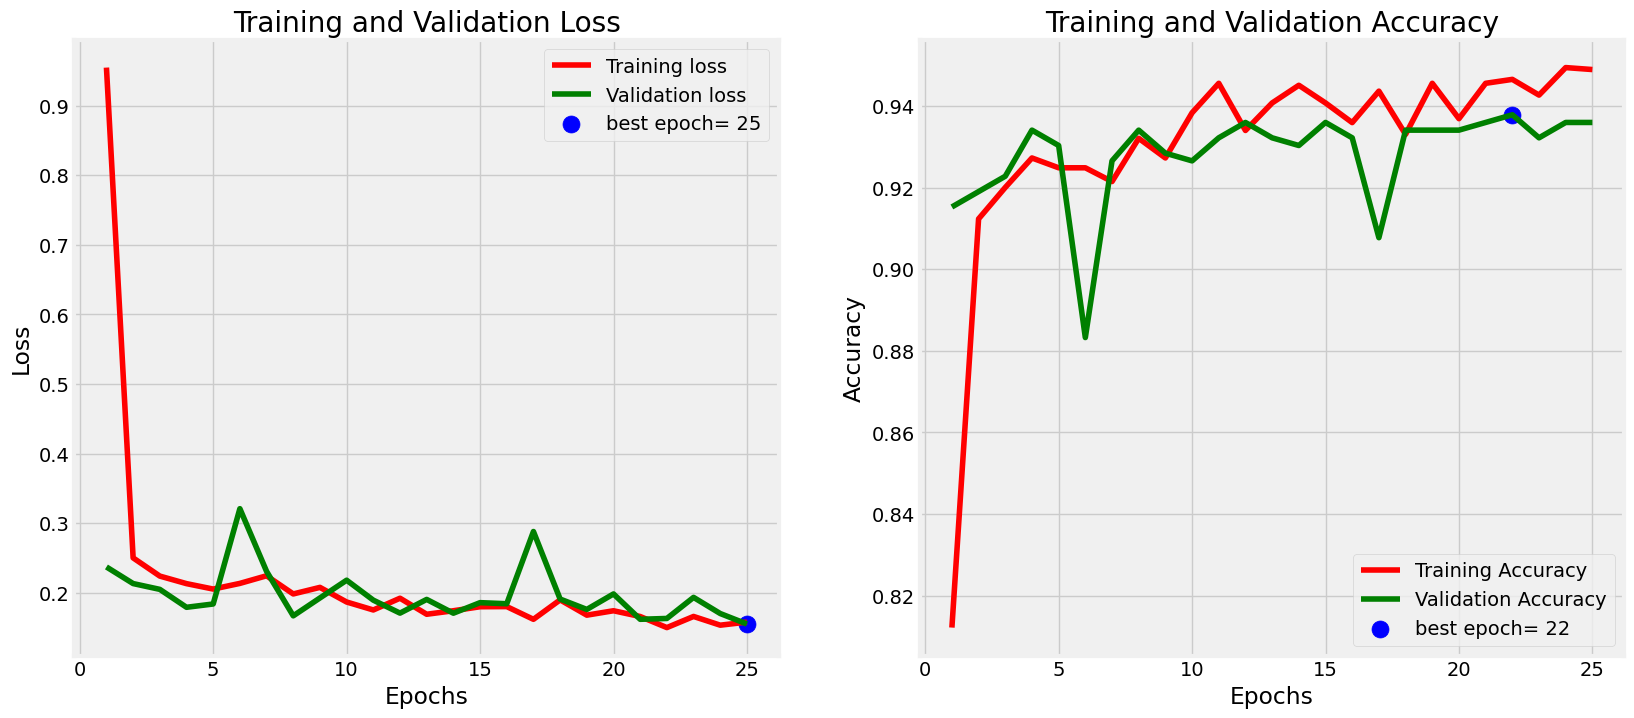

In [ ]:
# Define needed variables
tr_acc = model_vgg_history.history['accuracy']
tr_loss =model_vgg_history.history['loss']
val_acc = model_vgg_history.history['val_accuracy']
val_loss = model_vgg_history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

Inceptionv3 Model

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
    print(layer)

In [ ]:
model_inception = Sequential()

model_inception.add(inception)
model_inception.add(Flatten())
model_inception.add(Dropout(0.2))
model_inception.add(Dense(256,activation='relu'))
model_inception.add(Dropout(0.2))
model_inception.add(Dense(2,activation='softmax'))

In [ ]:
model_inception.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dropout_2 (Dropout)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               13107456  
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 34910754 (133.17 MB)
Trainable params: 3

In [ ]:
model_inception.compile(
    optimizer = Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
model_inception_history =model_inception.fit(
  train_set,
  validation_data=validation_set,
  epochs=EPOCHS,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/25
65/65 [==============================] - 98s 804ms/step - loss: 1.4926 - accuracy: 0.7794 - val_loss: 23.1402 - val_accuracy: 0.5461
Epoch 2/25
65/65 [==============================] - 41s 628ms/step - loss: 0.2065 - accuracy: 0.9355 - val_loss: 0.2358 - val_accuracy: 0.9473
Epoch 3/25
65/65 [==============================] - 39s 602ms/step - loss: 0.1948 - accuracy: 0.9451 - val_loss: 0.3304 - val_accuracy: 0.9228
Epoch 4/25
65/65 [==============================] - 42s 647ms/step - loss: 0.1421 - accuracy: 0.9586 - val_loss: 0.1120 - val_accuracy: 0.9605
Epoch 5/25
65/65 [==============================] - 39s 599ms/step - loss: 0.1152 - accuracy: 0.9653 - val_loss: 0.1563 - val_accuracy: 0.9586
Epoch 6/25
65/65 [==============================] - 38s 587ms/step - loss: 0.1060 - accuracy: 0.9687 - val_loss: 0.0991 - val_accuracy: 0.9736
Epoch 7/25
65/65 [==============================] - 41s 626ms/step - loss: 0.1030 - accuracy: 0.9759 - val_loss: 0.1097 - val_accuracy: 0.969

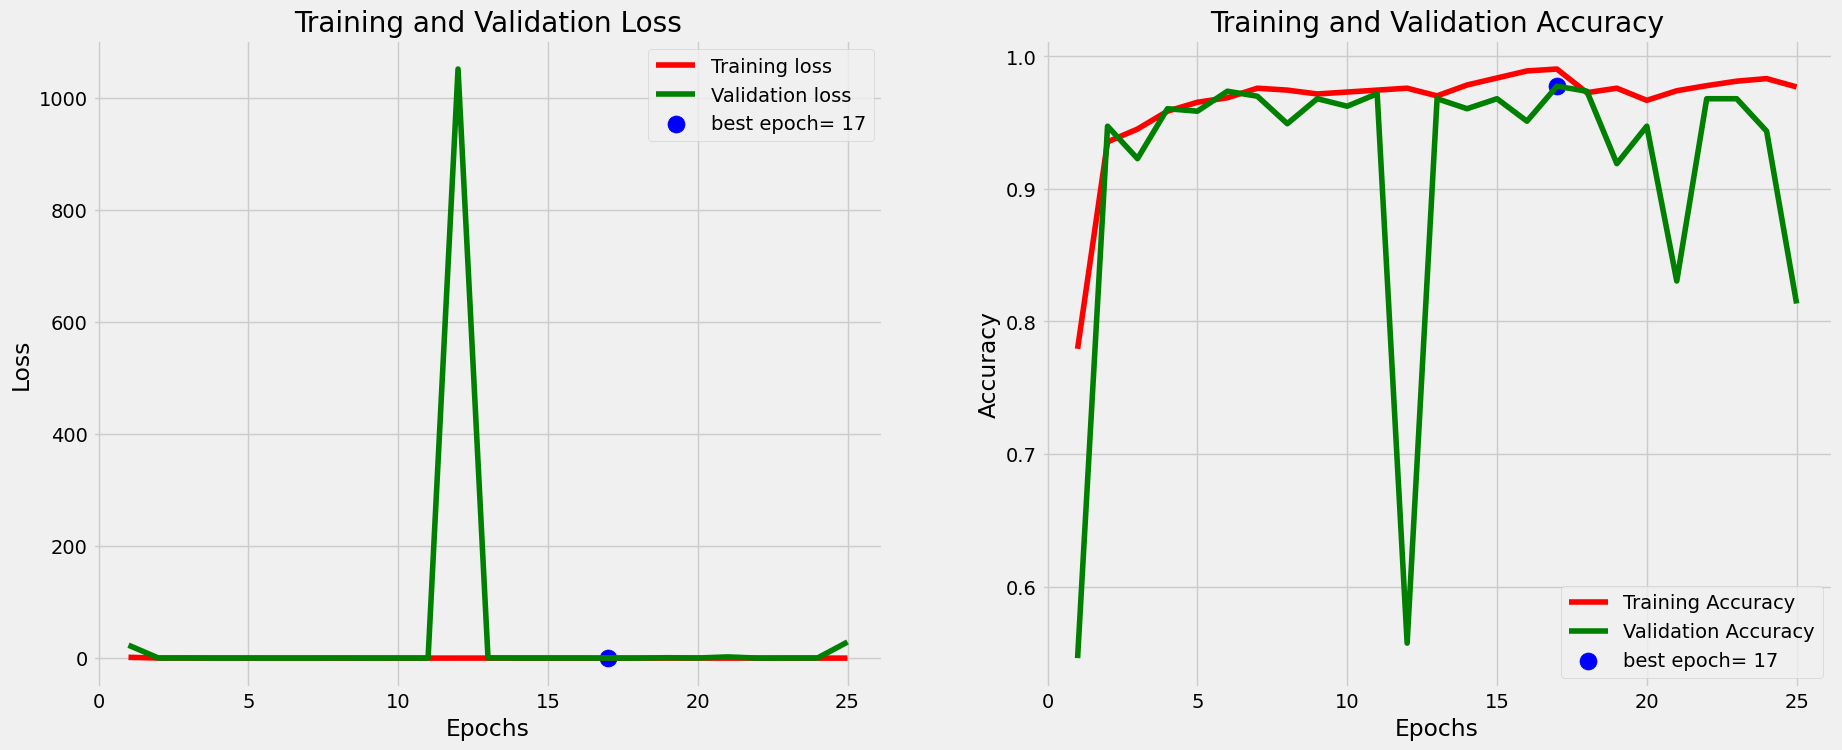

In [ ]:
# Define needed variables
tr_acc = model_inception_history.history['accuracy']
tr_loss =model_inception_history.history['loss']
val_acc = model_inception_history.history['val_accuracy']
val_loss = model_inception_history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

Prediction

In [ ]:
import numpy as np

def extract_data(generator):
    data_list = []
    labels_list = []
    for _ in range(generator.__len__()):
        data, labels = generator.next()
        data_list.append(data)
        labels_list.append(labels)
    x = np.vstack(data_list)
    y = np.vstack(labels_list)
    return x, y

x_train, y_train = extract_data(train_set)
x_test, y_test = extract_data(validation_set)

In [ ]:
loss = model_vgg19.evaluate(x_test,y_test)
print("Test Acc: " + str(loss[1]))

17/17 [==============================] - 3s 158ms/step - loss: 0.1551 - accuracy: 0.9360
Test Acc: 0.935969889163971


In [ ]:
preds_vgg = model_vgg19.predict(x_test)
y_pred_vgg = np.argmax(preds_vgg , axis = 1 )

17/17 [==============================] - 3s 161ms/step


In [ ]:
print(len(x_test))

531


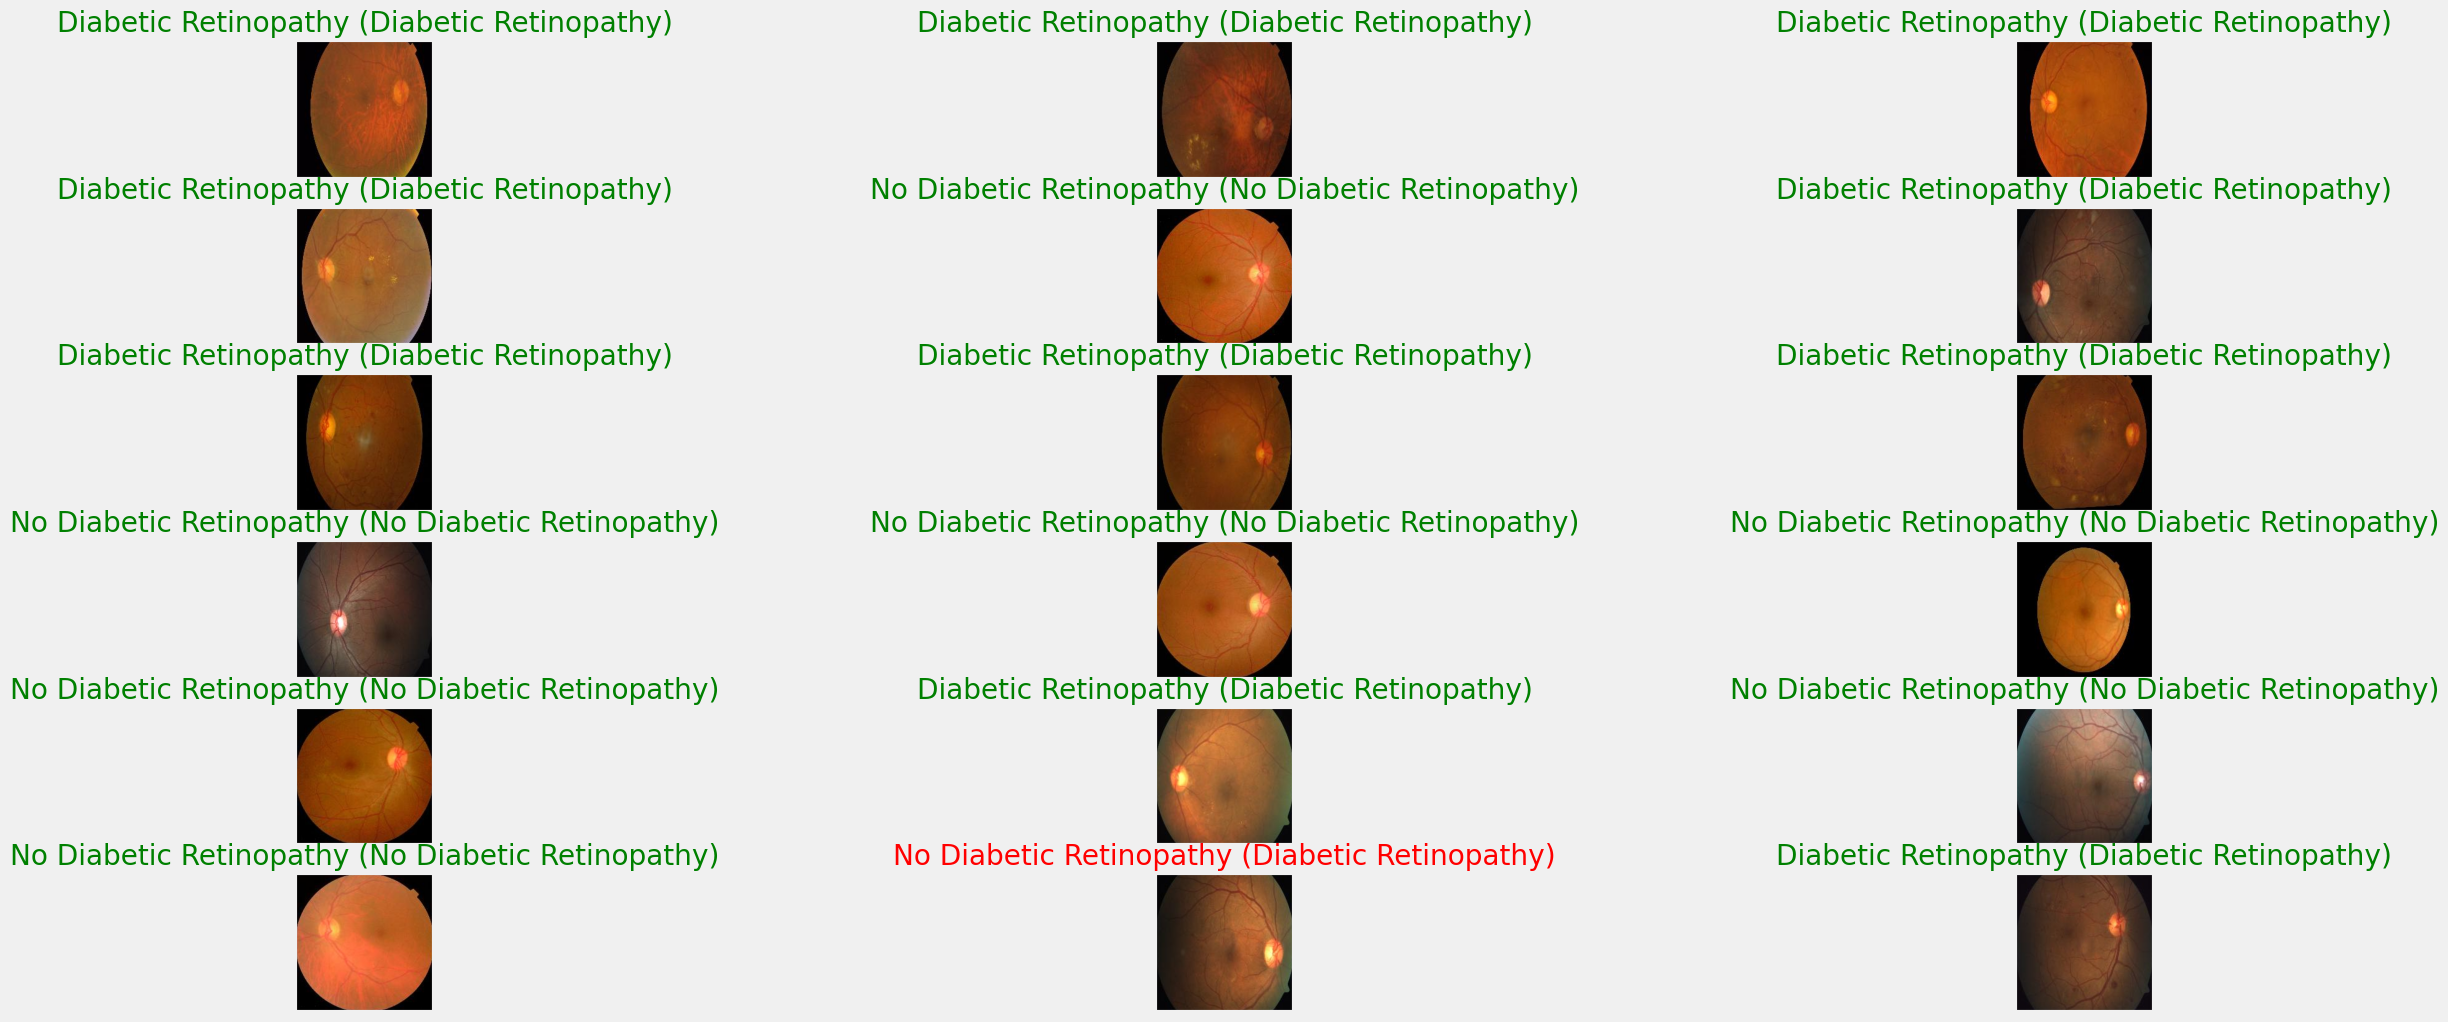

In [ ]:
label_dict = {0 : 'Diabetic Retinopathy', 1 : 'No Diabetic Retinopathy'}

figure = plt.figure(figsize=(28, 12))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=18)):
    ax = figure.add_subplot(6,3 , i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index_vgg = label_dict[(y_pred_vgg[index])]
    true_index_vgg = label_dict[np.argmax(y_test,axis=1)[index]]

    ax.set_title("{} ({})".format((predict_index_vgg),
                                  ( true_index_vgg)),
                                  color=("green" if predict_index_vgg == true_index_vgg else "red"))